# 03. Convolutional Neural Networks and Computer Vision with TensorFlow
So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

🔑 Note: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)
In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.


#What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

    Getting a dataset to work with (PIZZA_STEAK)
    Architecture of a convolutional neural network
    A quick end-to-end example (what we're working towards)
    
    **Steps in modelling for binary image classification with CNNs**

        Becoming one with the data
        Preparing data for modelling
        Creating a CNN model (starting with a baseline)
        Fitting a model (getting it to find patterns in our data)
        Evaluating a model
        Improving a model
        Making a prediction with a trained model
        
    Steps in modelling for multi-class image classification with CNNs
        Same as above (but this time with a different dataset)

#wHAT IS cnn - convolutional neural network? It is a stack of convolutional layers,and pooling layers and bunch of non-linear activations

  >>>SIMPLE CNN
  
  >>>DEEPER CNN

#Computerr vision-

  Computer vision is a practice of writing algorithm that can find patterns in the visual data such as the camera in the self-drive cars by recognizing the objects,cars in front


#Get the data -Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.




In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the file
zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


--2023-08-14 07:47:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.128.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.9MB/s    in 3.2s    

2023-08-14 07:47:54 (32.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#Inspect the data - become one with it

  It is very important that we inspect the data at the beginning to become one with the data

      Action - visualize many samples of data
      



In [3]:
!ls pizza_steak/

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
#Following are the data in pizz_steak>train folder
!ls pizza_steak/train/pizza steak/

ls: cannot access 'steak/': No such file or directory
pizza_steak/train/pizza:
1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  16

In [6]:
import os

#Walk through pizza_steak directory and list the 'number' of files
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f"there are{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are2 directories and 0 images in 'pizza_steak'.
there are2 directories and 0 images in 'pizza_steak/test'.
there are0 directories and 250 images in 'pizza_steak/test/steak'.
there are0 directories and 250 images in 'pizza_steak/test/pizza'.
there are2 directories and 0 images in 'pizza_steak/train'.
there are0 directories and 750 images in 'pizza_steak/train/steak'.
there are0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug 14 07:47 .
drwxr-xr-x 1 root root 4096 Aug 14 07:47 ..
drwxr-xr-x 4 root root 4096 Aug 14 07:47 test
drwxr-xr-x 4 root root 4096 Aug 14 07:47 train


In [8]:
#another way to find out how many images in file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [9]:
#To visualize our images, lets get the class names by program

#get the class names programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))#created a list of class_names from the sub directories of pizza_steak
print(class_names)

['pizza' 'steak']


In [10]:
#Lets visualize on our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory
  target_folder=target_dir+target_class

  #Get the random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot if using matplotlin
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image Shape:{img.shape}")
  return img

['114601.jpg']
Image Shape:(384, 512, 3)


array([[[171, 177, 191],
        [162, 166, 175],
        [164, 169, 172],
        ...,
        [149, 153, 165],
        [149, 152, 167],
        [157, 160, 175]],

       [[167, 169, 182],
        [170, 173, 182],
        [185, 186, 188],
        ...,
        [152, 156, 168],
        [150, 153, 168],
        [157, 160, 177]],

       [[172, 169, 180],
        [171, 168, 177],
        [168, 166, 169],
        ...,
        [160, 163, 178],
        [158, 164, 180],
        [156, 162, 178]],

       ...,

       [[229, 231, 243],
        [229, 231, 243],
        [230, 232, 244],
        ...,
        [123, 116, 123],
        [118, 112, 116],
        [114, 108, 112]],

       [[229, 231, 243],
        [229, 231, 243],
        [230, 232, 244],
        ...,
        [118, 112, 116],
        [114, 108, 112],
        [111, 105, 109]],

       [[230, 232, 244],
        [231, 233, 245],
        [232, 234, 246],
        ...,
        [115, 109, 113],
        [111, 105, 109],
        [109, 103, 107]]

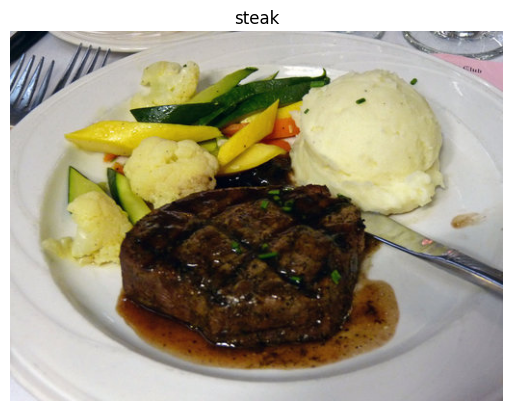

In [11]:
#View the random image from the training set
img=view_random_image(target_dir='pizza_steak/train/',target_class='steak')
img

In [12]:
import tensorflow as tf

#Convert the image into tensor
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[171, 177, 191],
        [162, 166, 175],
        [164, 169, 172],
        ...,
        [149, 153, 165],
        [149, 152, 167],
        [157, 160, 175]],

       [[167, 169, 182],
        [170, 173, 182],
        [185, 186, 188],
        ...,
        [152, 156, 168],
        [150, 153, 168],
        [157, 160, 177]],

       [[172, 169, 180],
        [171, 168, 177],
        [168, 166, 169],
        ...,
        [160, 163, 178],
        [158, 164, 180],
        [156, 162, 178]],

       ...,

       [[229, 231, 243],
        [229, 231, 243],
        [230, 232, 244],
        ...,
        [123, 116, 123],
        [118, 112, 116],
        [114, 108, 112]],

       [[229, 231, 243],
        [229, 231, 243],
        [230, 232, 244],
        ...,
        [118, 112, 116],
        [114, 108, 112],
        [111, 105, 109]],

       [[230, 232, 244],
        [231, 233, 245],
        [232, 234, 246],
        ...,
        [115, 109, 11

In [13]:
#View the image shape
img.shape #returns width,height and color channels


(384, 512, 3)

In [14]:
img/255

array([[[0.67058824, 0.69411765, 0.74901961],
        [0.63529412, 0.65098039, 0.68627451],
        [0.64313725, 0.6627451 , 0.6745098 ],
        ...,
        [0.58431373, 0.6       , 0.64705882],
        [0.58431373, 0.59607843, 0.65490196],
        [0.61568627, 0.62745098, 0.68627451]],

       [[0.65490196, 0.6627451 , 0.71372549],
        [0.66666667, 0.67843137, 0.71372549],
        [0.7254902 , 0.72941176, 0.7372549 ],
        ...,
        [0.59607843, 0.61176471, 0.65882353],
        [0.58823529, 0.6       , 0.65882353],
        [0.61568627, 0.62745098, 0.69411765]],

       [[0.6745098 , 0.6627451 , 0.70588235],
        [0.67058824, 0.65882353, 0.69411765],
        [0.65882353, 0.65098039, 0.6627451 ],
        ...,
        [0.62745098, 0.63921569, 0.69803922],
        [0.61960784, 0.64313725, 0.70588235],
        [0.61176471, 0.63529412, 0.69803922]],

       ...,

       [[0.89803922, 0.90588235, 0.95294118],
        [0.89803922, 0.90588235, 0.95294118],
        [0.90196078, 0

#Build an end-to-end CNN Model

  🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

    So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

  #Lets Build a convolutional neural network, to find patterns in our images.

  Lets do the following things,

    Load our images

    Pre-process our images

    Build a CNN to find patterns in our images

    Compile our CNN

    Fit our CNN to our training data


In [15]:
import tensorflow as pf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set seed
tf.random.set_seed(42)

#pre-process the data (set all the values between(0&1) - scaling/normalizing the data)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup path in our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#Import Data from Directories and turn into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

#Build a CNN model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model.As wee have already created train_data, no need to pass x and y
history_1=model_1.fit(train_data,epochs=5,validation_data=valid_data,validation_steps=len(valid_data))#as it is running in batches, there will be 47 barch operations with 32images/batcch

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 166ms/step - loss: 0.5866 - accuracy: 0.6833 - val_loss: 0.4016 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4207 - accuracy: 0.8093 - val_loss: 0.3509 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3923 - accuracy: 0.8280 - val_loss: 0.3544 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3462 - accuracy: 0.8507 - val_loss: 0.3291 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.2955 - accuracy: 0.8767 - val_loss: 0.3861 - val_accuracy: 0.8320


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#Trying an non-CNN model on our image

Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.
The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [23]:
#Using the same model as above

#Set Random seed
tf.random.set_seed(42)

#Create the model
model_2=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                                                     tf.keras.layers.Dense(4,activation='relu'),
                                                     tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
                                                     ])

#Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.1),
                metrics=['accuracy'])

#Fit the model
history_2=model_2.fit(train_data,epochs=5,validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 155ms/step - loss: 0.6937 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000


In [22]:
#Check 2nd model arcchitecture
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Despite having more number of Param's, our model_2 is not performing better than the first model. Lets improve our model_2 by adding another layer

#Set Random seed
tf.random.set_seed(42)

#Create the model
model_3=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                                                     tf.keras.layers.Dense(100,activation='relu'),
                                                     tf.keras.layers.Dense(100,activation='relu'),
                                                     tf.keras.layers.Dense(100,activation='relu'),
                                                     tf.keras.layers.Dense(1,activation='sigmoid')])

#Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
histoy_3=model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 116ms/step - loss: 3.8085 - accuracy: 0.6287 - val_loss: 1.6344 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.8148 - accuracy: 0.7107 - val_loss: 0.5772 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6428 - accuracy: 0.7373 - val_loss: 0.6765 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6594 - accuracy: 0.7353 - val_loss: 0.5834 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5124 - accuracy: 0.7673 - val_loss: 0.4954 - val_accuracy: 0.7720


In [28]:
#How does the architecture look
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_25 (Dense)            (None, 100)               15052900  
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

#Binary Classification: Lets break it down

      Become one with data

      prerprocess the data (normalize/standardize

      created the model -baseline model

      fit the model

      Evaluate the model

      Improve the model by adjusting the parrameters

      Repeat untill satisfied (experiment, experiment, experiment)



#1.Become one with data

['2222018.jpg']
Image Shape:(512, 512, 3)
['1665654.jpg']
Image Shape:(384, 512, 3)


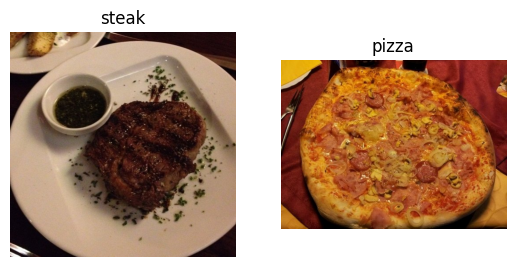

In [38]:
#Lets visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('/content/pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('/content/pizza_steak/train/','pizza')

#2.Preprocessing our data - To Load model

In [40]:
#Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

#Turn our data into batches - rather than looking into whole data, our model might only look at 32 day at a time

It does this for couple of reasons

  1.More data points might not fit into the memory of the processor

  2.trying to learn the patterns in 10000+ images in one hit might not result in the model to learn verry well

  3.Why 32 samples in a batch? Yann LeCun


#Why 32 samples in a batch?

Revisiting Small Batch Training for Deep Neural Networks
Dominic Masters, Carlo Luschi
Modern deep neural network training is typically based on mini-batch stochastic gradient optimization. While the use of large mini-batches increases the available computational parallelism, small batch training has been shown to provide improved generalization performance and allows a significantly smaller memory footprint, which might also be exploited to improve machine throughput.
In this paper, we review common assumptions on learning rate scaling and training duration, as a basis for an experimental comparison of test performance for different mini-batch sizes. We adopt a learning rate that corresponds to a constant average weight update per gradient calculation (i.e., per unit cost of computation), and point out that this results in a variance of the weight updates that increases linearly with the mini-batch size m.
The collected experimental results for the CIFAR-10, CIFAR-100 and ImageNet datasets show that increasing the mini-batch size progressively reduces the range of learning rates that provide stable convergence and acceptable test performance. On the other hand, small mini-batch sizes provide more up-to-date gradient calculations, which yields more stable and reliable training. The best performance has been consistently obtained for mini-batch sizes between m=2 and m=32, which contrasts with recent work advocating the use of mini-batch sizes in the thousands.


In [42]:
#Train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


In [44]:
#Lets load in our image data from directories into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode='binary',batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode='binary',batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [45]:
#Get sample of next train data batch
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [46]:
#Check the batch size
len(train_data)

47

In [47]:
#Get the first 2 images
images[:2],images[0].shape

(array([[[[0.69411767, 0.5686275 , 0.50980395],
          [0.69411767, 0.57254905, 0.5019608 ],
          [0.69411767, 0.5803922 , 0.50980395],
          ...,
          [0.5294118 , 0.427451  , 0.29803923],
          [0.5294118 , 0.427451  , 0.28235295],
          [0.5294118 , 0.43137258, 0.27450982]],
 
         [[0.7058824 , 0.58431375, 0.5137255 ],
          [0.69803923, 0.58431375, 0.5137255 ],
          [0.6862745 , 0.5764706 , 0.49411768],
          ...,
          [0.54509807, 0.4431373 , 0.3137255 ],
          [0.5294118 , 0.427451  , 0.2901961 ],
          [0.5294118 , 0.427451  , 0.28235295]],
 
         [[0.6862745 , 0.5764706 , 0.4901961 ],
          [0.68235296, 0.57254905, 0.4901961 ],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5568628 , 0.45098042, 0.33333334],
          [0.5411765 , 0.43529415, 0.31764707],
          [0.5411765 , 0.43529415, 0.31764707]],
 
         ...,
 
         [[0.7686275 , 0.5647059 , 0.41176474],
          [0.76862

In [48]:
#View the first batch labels
labels

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
      dtype=float32)